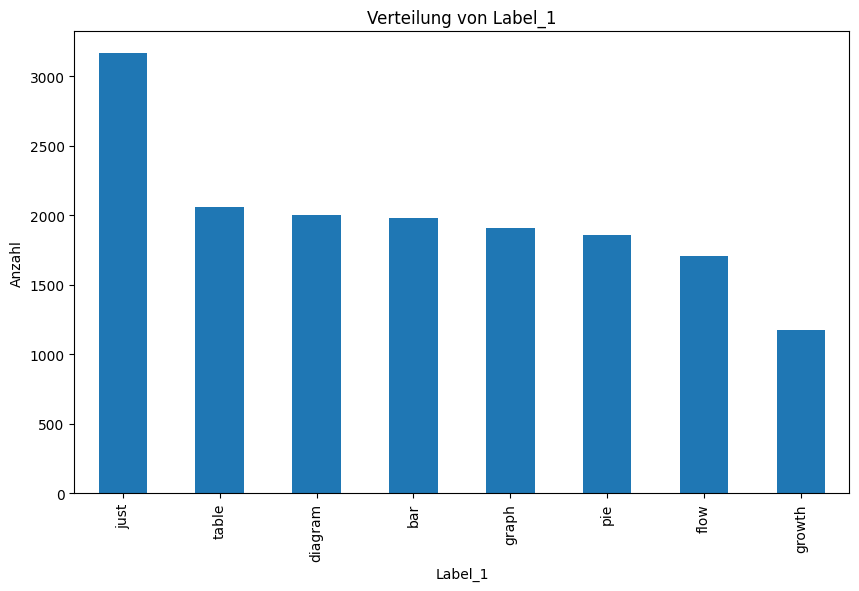

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Verzeichnis mit den Dateien im 'graphs'-Ordner
directory = './data'

# Liste zum Speichern der extrahierten Informationen
data = []

# Durchlaufe alle Unterverzeichnisse und Dateien
for root, dirs, files in os.walk(directory):
    for filename in files:
        # Filtere nach Bilddateien
        if filename.endswith(".png") or filename.endswith(".jpg") or filename.endswith(".jpeg"):
            # Splitte den Dateinamen in Teile
            parts = filename.split('_')
            
            # Extrahiere die benötigten Labels (Anpassen je nach Schema)
            label_1 = parts[0]
            label_2 = parts[1]
            
            # Füge die extrahierten Labels zur Liste hinzu
            data.append([label_1, label_2])

# Wandle die Liste in einen DataFrame um
df = pd.DataFrame(data, columns=['Label_1', 'Label_2'])

# Zeige eine einfache Visualisierung (z.B. Anzahl der Labels)
plt.figure(figsize=(10, 6))
df['Label_1'].value_counts().plot(kind='bar')
plt.title('Verteilung von Label_1')
plt.xlabel('Label_1')
plt.ylabel('Anzahl')
plt.show()



In [4]:
import os
import shutil
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Pfad zu den Daten
base_dir = './data'
categories = ['bar_chart', 'diagram', 'flow_chart', 'graph', 'just_img', 'pie_chart', 'table']

# Verzeichnisse für Trainings- und Testdaten
train_dir = './split_data/train'
test_dir = './split_data/test'

# Erstelle Trainings- und Testverzeichnisse
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Funktion zum Aufteilen der Daten in Trainings- und Testsets
def split_data():
    for category in categories:
        # Hole die Pfade zu den Bilddateien
        category_path = os.path.join(base_dir, category)
        images = [os.path.join(category_path, img) for img in os.listdir(category_path) if img.endswith(('png', 'jpg', 'jpeg'))]
        
        # Teile die Daten in Trainings- und Testdaten (80-20 Split)
        train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)
        
        # Zielordner erstellen
        train_category_dir = os.path.join(train_dir, category)
        test_category_dir = os.path.join(test_dir, category)
        os.makedirs(train_category_dir, exist_ok=True)
        os.makedirs(test_category_dir, exist_ok=True)
        
        # Verschiebe die Bilder in die jeweiligen Ordner
        for img in train_imgs:
            shutil.copy(img, train_category_dir)
        for img in test_imgs:
            shutil.copy(img, test_category_dir)

# Aufteilen der Daten
split_data()




In [5]:
import os

# Pfade zu den "test" und "train" Verzeichnissen
test_directory = './split_data/test'
train_directory = './split_data/train'

# Funktion zum Zählen der Bilder in den Kategorien eines Verzeichnisses
def count_images(directory):
    category_counts = {}
    # Iteriere über alle Unterordner im angegebenen Verzeichnis
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        # Sicherstellen, dass es sich um ein Verzeichnis handelt
        if os.path.isdir(category_path):
            # Zähle die Bilddateien in diesem Kategorie-Ordner
            image_count = sum(1 for file in os.listdir(category_path)
                              if file.endswith(".png") or file.endswith(".jpg") or file.endswith(".jpeg"))
            category_counts[category] = image_count
    return category_counts

# Zähle die Bilder im "test"-Verzeichnis
test_counts = count_images(test_directory)
print("Bildanzahl in 'test' nach Kategorie:")
for category, count in test_counts.items():
    print(f"{category}: {count}")

# Zähle die Bilder im "train"-Verzeichnis
train_counts = count_images(train_directory)
print("\nBildanzahl in 'train' nach Kategorie:")
for category, count in train_counts.items():
    print(f"{category}: {count}")


Bildanzahl in 'test' nach Kategorie:
bar_chart: 397
diagram: 401
flow_chart: 342
graph: 382
just_img: 633
pie_chart: 372
table: 413

Bildanzahl in 'train' nach Kategorie:
bar_chart: 1584
diagram: 1604
flow_chart: 1366
graph: 1528
just_img: 2531
pie_chart: 1485
table: 1648


In [6]:
import os
import random
import shutil

# Ordnerpfade für 'test' und 'train'
test_directory = './split_data/test'
train_directory = './split_data/train'

# Funktion zur Anpassung der Bildanzahl in den Kategorien
def balance_images(directory):
    # Zähle die Anzahl der Bilder in jeder Kategorie
    category_counts = {category: len([file for file in os.listdir(os.path.join(directory, category))
                                      if file.endswith(".png") or file.endswith(".jpg") or file.endswith(".jpeg")])
                       for category in os.listdir(directory) if os.path.isdir(os.path.join(directory, category))}
    
    # Finde die minimale Bildanzahl in den Kategorien
    min_count = min(category_counts.values())
    
    # Für jede Kategorie die Anzahl der Bilder auf min_count reduzieren
    for category, count in category_counts.items():
        category_path = os.path.join(directory, category)
        if count > min_count:
            # Wähle zufällig Bilder, die entfernt werden sollen
            files = [file for file in os.listdir(category_path)
                     if file.endswith(".png") or file.endswith(".jpg") or file.endswith(".jpeg")]
            files_to_remove = random.sample(files, count - min_count)
            for file in files_to_remove:
                os.remove(os.path.join(category_path, file))
        print(f"{category}: {min_count} Bilder nach Anpassung")

# Anwendung der Funktion auf 'test' und 'train'
print("Anpassung der Bildanzahl in 'test':")
balance_images(test_directory)

print("\nAnpassung der Bildanzahl in 'train':")
balance_images(train_directory)


Anpassung der Bildanzahl in 'test':
bar_chart: 342 Bilder nach Anpassung
diagram: 342 Bilder nach Anpassung
flow_chart: 342 Bilder nach Anpassung
graph: 342 Bilder nach Anpassung
just_img: 342 Bilder nach Anpassung
pie_chart: 342 Bilder nach Anpassung
table: 342 Bilder nach Anpassung

Anpassung der Bildanzahl in 'train':
bar_chart: 1366 Bilder nach Anpassung
diagram: 1366 Bilder nach Anpassung
flow_chart: 1366 Bilder nach Anpassung
graph: 1366 Bilder nach Anpassung
just_img: 1366 Bilder nach Anpassung
pie_chart: 1366 Bilder nach Anpassung
table: 1366 Bilder nach Anpassung


In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import math

# Datenpfade und Einstellungen
train_data_dir = './split_data/train'  
val_data_dir = './split_data/test'

# Erstellen von ImageDataGenerator ohne Augmentation (normalisierung der Bilder)
train_datagen = ImageDataGenerator(rescale=1.0/255)

val_datagen = ImageDataGenerator(rescale=1.0/255)

# Daten vorbereiten
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)


# Berechnung der Schritte pro Epoche basierend auf der Anzahl der Bilder
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size

# Modifiziertes Modell
model = Sequential([
    Input(shape=(128, 128, 3)),  # Input-Layer hinzufügen
    
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(256, (3, 3), activation='relu', padding='same'),  # Neue Convolutional-Schicht
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    GlobalAveragePooling2D(),  # Global Average Pooling statt Flatten
    
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(train_generator.num_classes, activation='softmax')
])

# Optimizer
optimizer = Adam(learning_rate=0.0005)

# Modell kompiliert
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler und Early Stopping
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True
)

# Modell trainieren
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_generator,
    validation_steps=validation_steps,
    epochs=50,
    callbacks=[lr_scheduler, early_stopping]
)

# Modell speichern
model.save('diagram_classifier_dumpclass_v2.h5')

# Modell evaluieren
val_loss, val_accuracy = model.evaluate(val_generator, steps=validation_steps)

print(f'Validierungsverlust: {val_loss:.4f}')
print(f'Validierungsgenauigkeit: {val_accuracy:.4f}')


Found 9562 images belonging to 7 classes.
Found 2394 images belonging to 7 classes.
Epoch 1/50


c:\Users\felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


298/298 ━━━━━━━━━━━━━━━━━━━━ 108s 353ms/step - accuracy: 0.3550 - loss: 2.0602 - val_accuracy: 0.2863 - val_loss: 2.3320 - learning_rate: 5.0000e-04
Epoch 2/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.5000 - loss: 1.2417 - val_accuracy: 0.2692 - val_loss: 2.3069 - learning_rate: 5.0000e-04
Epoch 3/50


c:\Users\felix\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


298/298 ━━━━━━━━━━━━━━━━━━━━ 105s 353ms/step - accuracy: 0.5816 - loss: 1.2821 - val_accuracy: 0.4274 - val_loss: 1.7703 - learning_rate: 5.0000e-04
Epoch 4/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.5938 - loss: 1.0597 - val_accuracy: 0.6538 - val_loss: 1.2914 - learning_rate: 5.0000e-04
Epoch 5/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 106s 354ms/step - accuracy: 0.6722 - loss: 0.9938 - val_accuracy: 0.4578 - val_loss: 1.8122 - learning_rate: 5.0000e-04
Epoch 6/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.5938 - loss: 0.9484 - val_accuracy: 0.6154 - val_loss: 1.4066 - learning_rate: 5.0000e-04
Epoch 7/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 106s 353ms/step - accuracy: 0.7415 - loss: 0.8115 - val_accuracy: 0.6905 - val_loss: 0.8348 - learning_rate: 5.0000e-04
Epoch 8/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step - accuracy: 0.7500 - loss: 0.8576 - val_accuracy: 0.7692 - val_loss: 0.7164 - learning_rate: 5.0000e-04
Epoch 9/50
298/298 ━━━━━━━━━━━━━━━━━━━━ 106s 353ms/step -

74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - accuracy: 0.9131 - loss: 0.2650
Validierungsverlust: 0.2753
Validierungsgenauigkeit: 0.9113


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Schritt 1: Modell laden
model = tf.keras.models.load_model('diagram_classifier_dumpclass.h5')

# Schritt 2: Testdaten vorbereiten
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(
    'split_data/test',  # Verzeichnis der Testdaten
    target_size=(128, 128),  # Zielgröße der Bilder
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Shuffle ist hier nicht notwendig
)

# Schritt 3: Modell evaluieren
loss, accuracy = model.evaluate(test_generator)

print(f'Validierungsverlust: {loss}')
print(f'Validierungsgenauigkeit: {accuracy}')


Found 2129 images belonging to 6 classes.
 2/67 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - accuracy: 0.8828 - loss: 0.2770  

c:\Users\felix\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.8781 - loss: 0.3623
Validierungsverlust: 0.4451705515384674
Validierungsgenauigkeit: 0.8543917536735535


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1. Lade das Modell
model = load_model('diagram_classifier_dumpclass.h5')

# 2. Lade und vorverarbeite das Bild
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))  # Größe anpassen
    img_array = image.img_to_array(img)  # Bild in Array umwandeln
    img_array = np.expand_dims(img_array, axis=0)  # Batch-Dimension hinzufügen
    img_array = img_array / 255.0  # Normalisierung
    return img_array

# 3. Wähle den Pfad zum Bild und lade es
img_path = r'.\split_data\test\flow_chart\flow_chart_4a3e5e1f-8c5f-4f83-a502-8d2aa3587e5e.png'  # Hier den Pfad zum Bild eingeben
img_height, img_width = 128, 128  # Größe entsprechend dem Modell
processed_image = load_and_preprocess_image(img_path)

# 4. Mache die Vorhersage
predictions = model.predict(processed_image)
predicted_class = np.argmax(predictions, axis=1)  # Index der Klasse mit der höchsten Wahrscheinlichkeit

# 5. Ausgabe der Vorhersage
class_labels = ['bar_chart', 'diagram', 'flow_chart', 'graph', 'growth_chart', 'pie_chart']  # Füge hier deine Klassenbezeichnungen hinzu
predicted_label = class_labels[predicted_class[0]]
print(f'Die vorhergesagte Klasse ist: {predicted_label}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Die vorhergesagte Klasse ist: flow_chart


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━

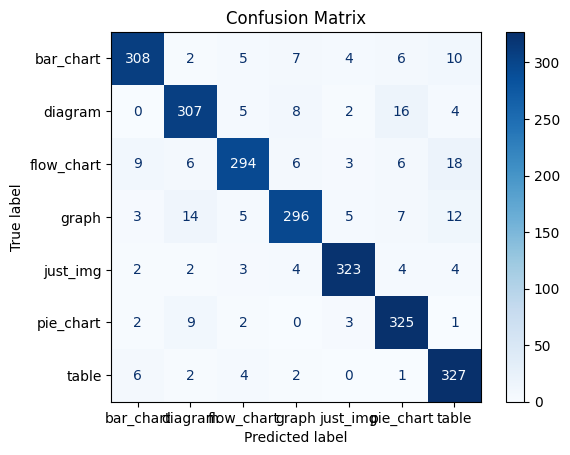

Genauigkeit (Accuracy): 0.91
Rückruf (Recall): 0.91
F1-Score: 0.91
Bild: table_05c05f09-532b-4677-840a-fc0f3112e752.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: table_0711f05e-e6ad-4d4f-afae-5ca3d5049f68.jpg, Vorhergesagte Klasse: table, Tatsächliche Klasse: bar_chart
Bild: table_098b21a9-04c7-464f-a570-6115fd9c7a63.png, Vorhergesagte Klasse: graph, Tatsächliche Klasse: bar_chart
Bild: table_0b262c84-bba5-4bec-8da2-3c97ed7cf98e.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: table_0bd65550-f81e-429e-899c-a1516ba0d9b9.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: table_1 (2).jpg.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: table_10 (2).jpg.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: table_1080830.jpg.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: table_1126_bgcsb-yolnbsya-2-icnusyoci-ibpb-e-buebsin.jpg.jpg, Vorherg

In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# 1. Lade das Modell
model = load_model('diagram_classifier_dumpclass_v2.h5')

# 2. Definiere die Größe des Bildes
img_height, img_width = 128, 128  # Größe entsprechend dem Modell

# 3. Lade und vorverarbeite das Bild
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(img_height, img_width))  # Größe anpassen
    img_array = image.img_to_array(img)  # Bild in Array umwandeln
    img_array = np.expand_dims(img_array, axis=0)  # Batch-Dimension hinzufügen
    img_array = img_array / 255.0  # Normalisierung
    return img_array

# 4. Erstelle eine Liste aller Bilder und deren Labels
test_data_dir = r'C:\Users\felix\ITprojekt\split_data\test'
class_labels = os.listdir(test_data_dir)  # Hol die Namen der Unterordner
all_predictions = []
all_true_labels = []

# 5. Klassifiziere die Bilder
for label in class_labels:
    label_path = os.path.join(test_data_dir, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):  # Bildformate filtern
                processed_image = load_and_preprocess_image(img_path)
                
                # Mache die Vorhersage
                predictions = model.predict(processed_image)
                predicted_class = np.argmax(predictions, axis=1)  # Index der Klasse mit der höchsten Wahrscheinlichkeit
                
                # Speichere die Vorhersage und das tatsächliche Label
                all_predictions.append(predicted_class[0])
                all_true_labels.append(class_labels.index(label))  # Verwende den Index des Unterordners als Label

# 6. Erstelle die Verwirrungsmatrix
cm = confusion_matrix(all_true_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# 7. Berechne Metriken
accuracy = accuracy_score(all_true_labels, all_predictions)
recall = recall_score(all_true_labels, all_predictions, average='weighted')  # Für Mehrklassenklassifikation
f1 = f1_score(all_true_labels, all_predictions, average='weighted')  # Für Mehrklassenklassifikation

print(f'Genauigkeit (Accuracy): {accuracy:.2f}')
print(f'Rückruf (Recall): {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

# 8. Ausgabe der Vorhersagen
for img_file, pred, true in zip(os.listdir(label_path), all_predictions, all_true_labels):
    print(f'Bild: {img_file}, Vorhergesagte Klasse: {class_labels[pred]}, Tatsächliche Klasse: {class_labels[true]}')


In [2]:
for img_file, pred, true in zip(os.listdir(label_path), all_predictions, all_true_labels):
    print(f'Bild: {img_file}, Vorhergesagte Klasse: {class_labels[pred]}, Tatsächliche Klasse: {class_labels[true]}')

Bild: pie_chart_11a8161b-c4a1-4df5-bda6-d3a0b7e7af83.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: pie_chart_14-1.jpg.jpg, Vorhergesagte Klasse: graph, Tatsächliche Klasse: bar_chart
Bild: pie_chart_14f31e19-841c-48e4-af29-7cab50845476.png.jpg, Vorhergesagte Klasse: flow_chart, Tatsächliche Klasse: bar_chart
Bild: pie_chart_15.11.png.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: pie_chart_1aab76b0-d212-4e30-a9f3-341b4d85a6a4.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: pie_chart_1e7fcd41-95e7-403e-bd60-7c5aac098458.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: pie_chart_1ec141b6-3908-4f0f-91c2-b6b575ec5437.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: pie_chart_2015-06-11_230001diagrammy-007.png.jpg, Vorhergesagte Klasse: bar_chart, Tatsächliche Klasse: bar_chart
Bild: pie_chart_220px-Atmospheric_air_components_percentage.jpg.jpg, Vorhergesag

In [4]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(all_true_labels, all_predictions)
print(f'Die Genauigkeit der Klassifikation beträgt: {accuracy:.2f}')

Die Genauigkeit der Klassifikation beträgt: 0.85


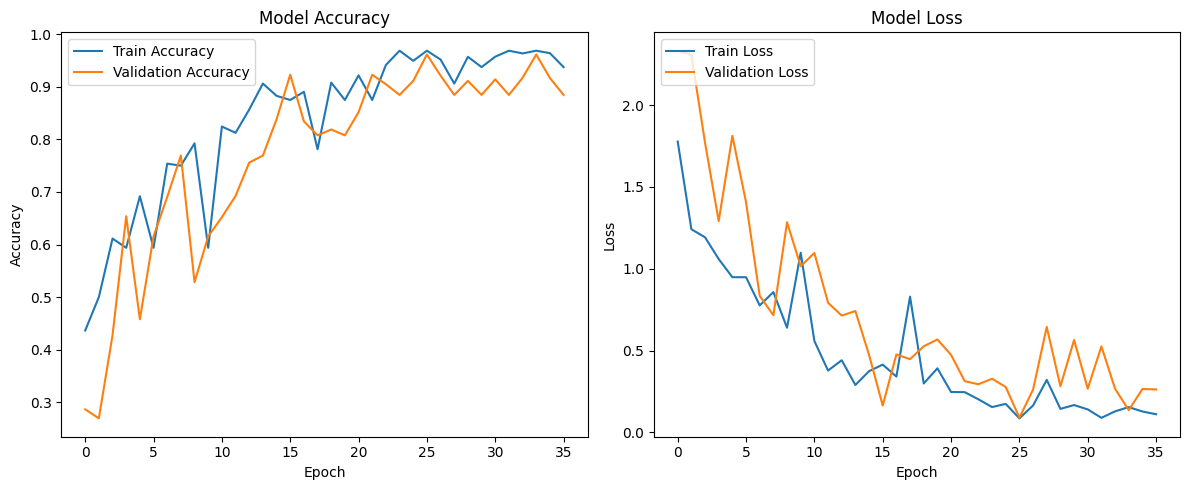

In [12]:
import matplotlib.pyplot as plt

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()